In [9]:
import os 
import random
from ultralytics import YOLO
from PIL import Image
import numpy as np
from rembg import remove
from inference.InferenceModel import InferenceModel
import matplotlib.pyplot as plt


##### Directory

In [8]:
TRAINED_MODEL_DIR = './trained_models'

YOLO_MODEL_DIR = os.path.join(TRAINED_MODEL_DIR, 'YOLO')
YOLO_BEST_MODEL = os.path.join('model_train_renfred_1', 'weights', 'best.pt')
YOLO_MODEL_PATH = os.path.join(YOLO_MODEL_DIR, YOLO_BEST_MODEL)

OCR_MODEL_DIR = os.path.join(TRAINED_MODEL_DIR, 'OCR')
OCR_BEST_MODEL = os.path.join('CRNN_MODEL_GregoV2', 'model', 'CRNN_MODEL_GregoV2.keras')
OCR_BEST_WEIGHTS = os.path.join(OCR_MODEL_DIR, 'CRNN_MODEL_Agus_V1', 'weight', 'best_weight.keras')
OCR_MODEL_PATH = os.path.join(OCR_MODEL_DIR, OCR_BEST_MODEL)
SAMPLE_IMAGE_PATH = os.path.join('./sample_image')

#### Yolo Model Test

In [10]:
yolo_model = YOLO(YOLO_MODEL_PATH)

print(os.listdir(SAMPLE_IMAGE_PATH))
image_files = [file for file in os.listdir(SAMPLE_IMAGE_PATH) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_image = image_files[5]
test_image_path = os.path.join(SAMPLE_IMAGE_PATH, random_image)
pil_image = Image.open(test_image_path)
# bg_removed_img = remove(pil_image)
numpy_image = np.array(pil_image)

yolo_result = yolo_model(test_image_path, conf=0.3)[0]


['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.png', '7.png', '8.jpg', '9.jpg']

image 1/1 c:\Users\NAN0C\Documents\Kuliah\Bangkit\Receipt_model\Inference_Model\sample_image\6.png: 640x416 1 date_time, 11 items, 1 receipt, 2 shops, 1 total, 774.0ms
Speed: 2.0ms preprocess, 774.0ms inference, 10.3ms postprocess per image at shape (1, 3, 640, 416)


#### Removed Backgound


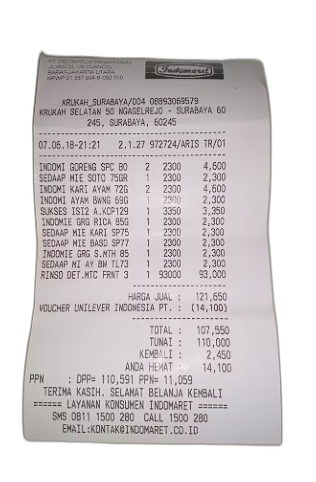

In [5]:
bg_removed = remove(pil_image)
plt.figure(figsize=(6, 6))
plt.imshow(bg_removed)
plt.axis('off')  # Hide the axes
plt.show()

In [11]:
yolo_result.show()

In [12]:
inference_model = InferenceModel(YOLO_MODEL_PATH, OCR_BEST_WEIGHTS, 0.5)
result = inference_model.predict(test_image_path)


0: 640x416 1 date_time, 11 items, 2 receipts, 2 shops, 1 total, 765.9ms
Speed: 2.1ms preprocess, 765.9ms inference, 10.4ms postprocess per image at shape (1, 3, 640, 416)
cropped_image len: 5
error here!
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction inp

#### Final result

In [13]:
print(result)

{'item': ['SEDAP ALE SOLD T0R 1 2500 2,300', 'INGONIE ANA RICK E5G 1 230 2,507', 'INOUKI KARI ATAR T2G 2 2300 4,000', 'SEOMAP MIE RKI SP79 1 2500 2,30', 'INDOML ATAN BNKa G90 1 20 2,300', 'IINGOMI AURENG SPC 80 2 2300 4,00', 'SURSES IS12 A.KCP129 1 30 3,380', 'StAMP RIE B90 SP/ 1 230 2,300', 'AINso0 Del.Mic FRNT S 1 9300 30,030', 'INDUNTE GMGS S.M1A 85 1 2300 2,', 'SEoAP N1 AP EN TE93 1 250 2,'], 'shop': '21u1eeuMa42J M', 'date_time': '', 'total': '161.555'}


Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━

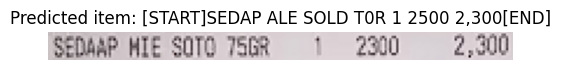

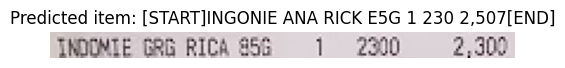

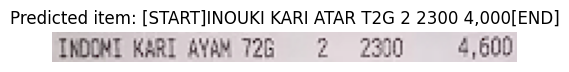

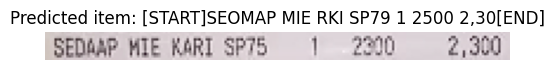

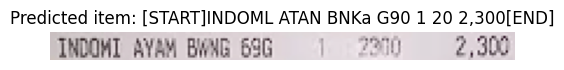

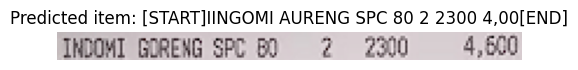

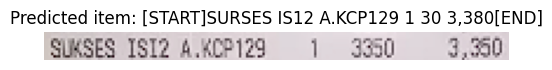

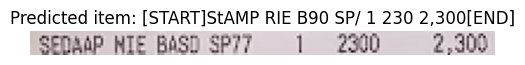

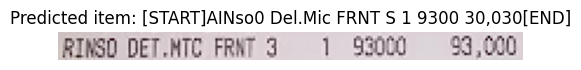

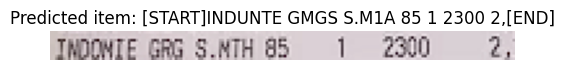

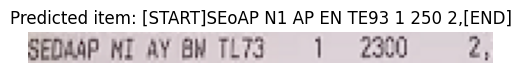

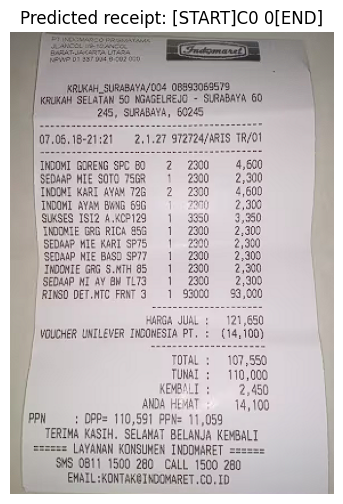

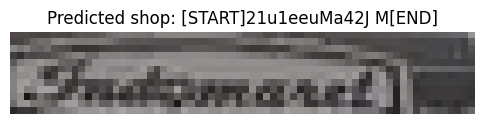

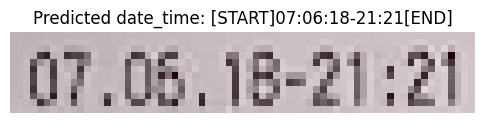

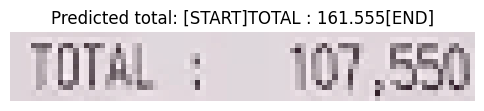

In [14]:
inference_model.visualize_results()